In [152]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Générez cette base de données telle que 

In [153]:
lambd1=np.random.normal((1,1),0.4,size=(300,2))
lambd2=np.random.normal((-1,-1),0.4,size=(300,2))

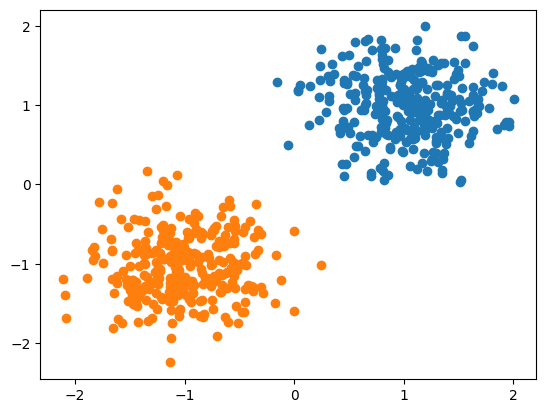

In [154]:
plt.scatter(lambd1[:,0],lambd1[:,1])
plt.scatter(lambd2[:,0],lambd2[:,1])


## Oui les données sont lineairement séparables

In [155]:
y=np.array([1 if i <300 else -1 for i in range(600)])
X=np.concatenate((lambd1,lambd2),axis=0)

# 4. Proposez une paramétrisation de SVC pour vous assurer :

In [156]:
clf=SVC(C=1000,kernel='linear',max_iter=-1)

## Pour la parametisation `kernel=linear` rendre le model lineaire et `max_iter=-1` signifie que on va apprendre jusqu'à ce que toutes les données soient bien classé

# 5. Entrainez un SVM avec cette paramétrisation sur l’ensemble des données

In [157]:
clf.fit(X,y)
pass

# 6. Du modèle appris, récupérez et affichez 

In [158]:
clf.n_support_

array([1, 2], dtype=int32)

In [159]:
indice_SV = clf.support_
alphas = clf.dual_coef_ [0]
b = clf.intercept_
print(f"Indices of support vectors: {indice_SV}, dual coefficients: {alphas},intercept: {b}")

Indices of support vectors: [323   0 105], dual coefficients: [-3.34705897  2.19228427  1.1547747 ],intercept: [0.06012753]


## Combien de valeurs contient alphas ? Pourquoi ?

In [160]:
len(alphas)

3

## Le nombre de alpha corrspond au nombre de point de support trouvé

# 7. À partir de ces valeurs, calculez le vecteur w

In [161]:
W=np.array(sum(alphas[i]*clf.support_vectors_[i] for i in range(len(alphas))))
W

array([1.57892723, 2.0503759 ])

# 8. Verifiez que les points supports sont telles que h(x) = w.Tx + b = ±1

In [162]:
clf.support_vectors_@W.T+b

array([-1.00058451,  1.00029226,  1.00029224])

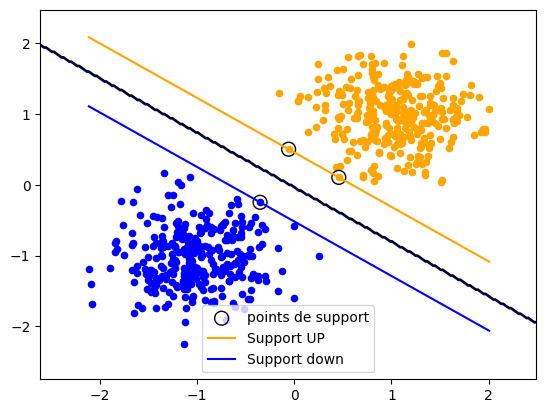

In [163]:
def mesh(X, h=0.02):
    x_min , x_max = X[:, 0]. min() - .5, X[:, 0]. max() + .5
    y_min , y_max = X[:, 1]. min() - .5, X[:, 1]. max() + .5
    xx , yy = np.meshgrid(np.arange(x_min , x_max , h), np.arange(y_min , y_max , h))
    return np.c_[xx.ravel (), yy.ravel ()], xx , yy
xtest_grid , x_grid , y_grid = mesh(X)
Z = clf.predict(xtest_grid)
Z = Z.reshape(x_grid.shape)
# Plot decision and support boundaries:
plt.contour(x_grid , y_grid , Z, colors =['blue', 'black', 'darkorange'], levels =[-1,0, 1])
# Plot data points and support vectors:
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='orange', s=20)
plt.scatter(X[y == -1, 0], X[y == -1, 1], c='b', s=20)
plt.scatter(clf.support_vectors_[:, 0],clf.support_vectors_[:, 1],s=100,linewidth=1,facecolors="none",edgecolors="k",label='points de support')
x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2_marg_up = (1-W[0]*x1-b)/W[1] # le droite de support h(x)=W.Tx+b=1
x2_marg_down = (-1-W[0]*x1-b)/W[1] # le droite de support h(x)=W.Tx+b=-1
plt.plot(x1,x2_marg_up,label='Support UP',c='orange')
plt.plot(x1,x2_marg_down,label='Support down',c='blue')
plt.legend()
plt.show()

# 2 SVM soft-margin sur un problème jouet

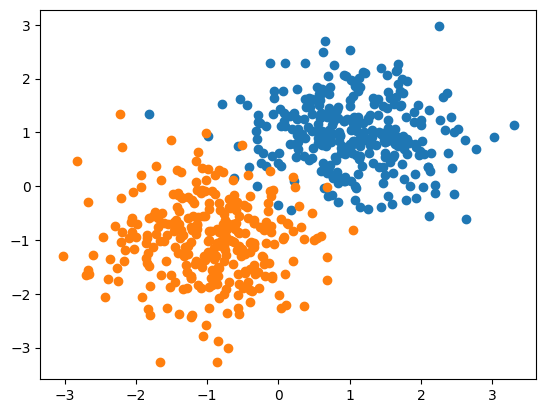

In [164]:
lambd1=np.random.normal((1,1),0.7,size=(300,2))
lambd2=np.random.normal((-1,-1),0.7,size=(300,2))
plt.scatter(lambd1[:,0],lambd1[:,1])
plt.scatter(lambd2[:,0],lambd2[:,1])

In [165]:
clf=SVC(C=1000,kernel='linear',max_iter=-1)
clf.fit(X,y)
pass

In [166]:
y=np.array([1 if i <300 else -1 for i in range(600)])
X=np.concatenate((lambd1,lambd2),axis=0)

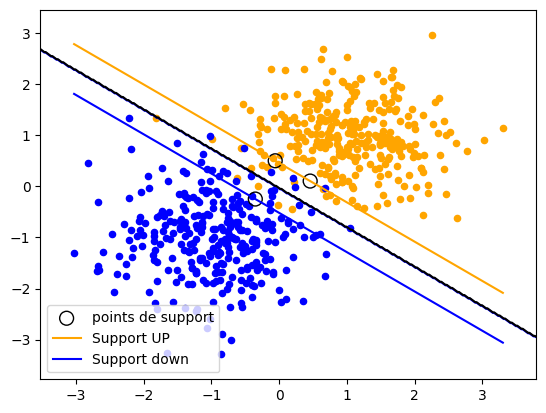

In [167]:
def mesh(X, h=0.02):
    x_min , x_max = X[:, 0]. min() - .5, X[:, 0]. max() + .5
    y_min , y_max = X[:, 1]. min() - .5, X[:, 1]. max() + .5
    xx , yy = np.meshgrid(np.arange(x_min , x_max , h), np.arange(y_min , y_max , h))
    return np.c_[xx.ravel (), yy.ravel ()], xx , yy
xtest_grid , x_grid , y_grid = mesh(X)
Z = clf.predict(xtest_grid)
Z = Z.reshape(x_grid.shape)
# Plot decision and support boundaries:
plt.contour(x_grid , y_grid , Z, colors =['blue', 'black', 'darkorange'], levels =[-1,0, 1])
# Plot data points and support vectors:
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='orange', s=20)
plt.scatter(X[y == -1, 0], X[y == -1, 1], c='b', s=20)
plt.scatter(clf.support_vectors_[:, 0],clf.support_vectors_[:, 1],s=100,linewidth=1,facecolors="none",edgecolors="k",label='points de support')
x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2_marg_up = (1-W[0]*x1-b)/W[1] # le droite de support h(x)=W.Tx+b=1
x2_marg_down = (-1-W[0]*x1-b)/W[1] # le droite de support h(x)=W.Tx+b=-1
plt.plot(x1,x2_marg_up,label='Support UP',c='orange')
plt.plot(x1,x2_marg_down,label='Support down',c='blue')
plt.legend()
plt.show()